In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from scipy.stats import skew

In [111]:
df = pd.read_csv("cities_by_day.csv")         #importing the dataset
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,1/2/2015,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,1/3/2015,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,1/4/2015,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,1/5/2015,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [112]:
df.columns

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'C6H6', 'C7H8', 'C8H10', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [113]:
df.shape

(29531, 16)

In [114]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  C6H6        23908 non-null  float64
 12  C7H8        21490 non-null  float64
 13  C8H10       11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [116]:
df.isnull().sum()  

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
C6H6           5623
C7H8           8041
C8H10         18109
AQI            4681
AQI_Bucket     4681
dtype: int64

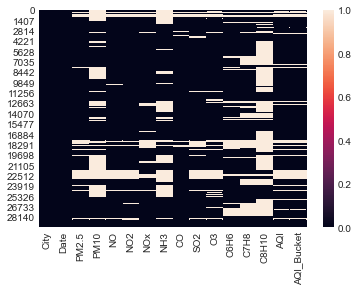

In [117]:
#visualizing the null values using heatmap
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.isnull())

In [118]:
# percentage of data missing 
df.isnull().sum()/df.shape[0] *100

City           0.000000
Date           0.000000
PM2.5         15.570079
PM10          37.723071
NO            12.129626
NO2           12.139785
NOx           14.171549
NH3           34.973418
CO             6.972334
SO2           13.050692
O3            13.619586
C6H6          19.041008
C7H8          27.229014
C8H10         61.322001
AQI           15.851139
AQI_Bucket    15.851139
dtype: float64

In [119]:
#dropping thw columns which have greater number of null values.
df = df.drop(['C8H10','NH3', 'PM10'], axis = 1 )

In [120]:
df["NO"]=df["NO"].fillna(df.NO2.mean())
df["PM2.5"]=df["PM2.5"].fillna(df['PM2.5'].mean())
df["NO2"]=df["NO2"].fillna(df.NO2.mean())
df["NOx"]=df["NOx"].fillna(df.NOx.mean())
df["CO"]=df["CO"].fillna(df.CO.mean())
df["SO2"]=df["SO2"].fillna(df.SO2.mean())
df["O3"]=df["O3"].fillna(df.O3.mean())
df["C6H6"]=df["C6H6"].fillna(df.C6H6.mean())
df["C7H8"]=df["C7H8"].fillna(df.C7H8.mean())


In [121]:
df.head()


,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015,67.450578,0.92,18.22,17.15,0.92,27.64,133.36,0.00,0.02,NaN,NaN
1,Ahmedabad,1/2/2015,67.450578,0.97,15.69,16.46,0.97,24.55,34.06,3.68,5.50,NaN,NaN
2,Ahmedabad,1/3/2015,67.450578,17.40,19.30,29.70,17.40,29.07,30.70,6.80,16.40,NaN,NaN
3,Ahmedabad,1/4/2015,67.450578,1.70,18.48,17.97,1.70,18.59,36.08,4.43,10.14,NaN,NaN
4,Ahmedabad,1/5/2015,67.450578,22.10,21.42,37.76,22.10,39.33,39.31,7.01,18.89,NaN,NaN


In [122]:
df.shape

(29531, 13)

In [123]:
df['AQI_Bucket'] = df['AQI_Bucket'].astype('category')

Moderate        8829
Satisfactory    8224
Poor            2781
Very Poor       2337
Good            1341
Severe          1338
Name: AQI_Bucket, dtype: int64

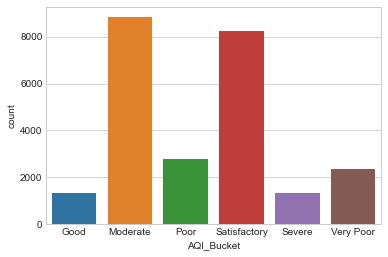

In [124]:
sns.countplot('AQI_Bucket',data=df)
df['AQI_Bucket'].value_counts()

In [125]:
#grouping the aqi by city and calculate average aqi per city
x=pd.DataFrame(df.groupby(['City'])[['AQI']].mean().sort_values(by='AQI', ascending = False).head(10))
x=x.reset_index('City')

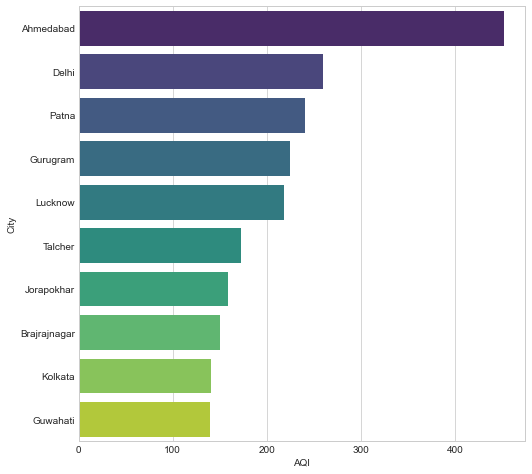

In [126]:
#plot
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(8,8))
sns.barplot(data= x , x='AQI', y= 'City',orient = 'h' , palette = 'viridis')

In [127]:
#segregating dates into months and years
df['year']=pd.DatetimeIndex(df['Date']).year
df['month']=pd.DatetimeIndex(df['Date']).month
df.head(5)

,City,Date,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket,year,month
0,Ahmedabad,1/1/2015,67.450578,0.92,18.22,17.15,0.92,27.64,133.36,0.00,0.02,NaN,NaN,2015,1
1,Ahmedabad,1/2/2015,67.450578,0.97,15.69,16.46,0.97,24.55,34.06,3.68,5.50,NaN,NaN,2015,1
2,Ahmedabad,1/3/2015,67.450578,17.40,19.30,29.70,17.40,29.07,30.70,6.80,16.40,NaN,NaN,2015,1
3,Ahmedabad,1/4/2015,67.450578,1.70,18.48,17.97,1.70,18.59,36.08,4.43,10.14,NaN,NaN,2015,1
4,Ahmedabad,1/5/2015,67.450578,22.10,21.42,37.76,22.10,39.33,39.31,7.01,18.89,NaN,NaN,2015,1


In [128]:
cols = ['City','Date','year','month', 'PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2',
       'O3', 'C6H6', 'C7H8','AQI','AQI_Bucket']
df = df.reindex(columns=cols)
df

,City,Date,year,month,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015,2015,1,67.450578,0.92,18.22,17.15,0.92,27.64,133.36,0.00000,0.020000,NaN,NaN
1,Ahmedabad,1/2/2015,2015,1,67.450578,0.97,15.69,16.46,0.97,24.55,34.06,3.68000,5.500000,NaN,NaN
2,Ahmedabad,1/3/2015,2015,1,67.450578,17.40,19.30,29.70,17.40,29.07,30.70,6.80000,16.400000,NaN,NaN
3,Ahmedabad,1/4/2015,2015,1,67.450578,1.70,18.48,17.97,1.70,18.59,36.08,4.43000,10.140000,NaN,NaN
4,Ahmedabad,1/5/2015,2015,1,67.450578,22.10,21.42,37.76,22.10,39.33,39.31,7.01000,18.890000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,6/27/2020,2020,6,15.020000,7.68,25.06,19.54,0.47,8.55,23.30,2.24000,12.070000,41.0,Good
29527,Visakhapatnam,6/28/2020,2020,6,24.380000,3.42,26.06,16.53,0.52,12.72,30.14,0.74000,2.210000,70.0,Satisfactory
29528,Visakhapatnam,6/29/2020,2020,6,22.910000,3.45,29.53,18.33,0.48,8.42,30.96,0.01000,0.010000,68.0,Satisfactory
29529,Visakhapatnam,6/30/2020,2020,6,16.640000,4.05,29.26,18.80,0.52,9.84,28.30,0.00000,0.000000,54.0,Satisfactory


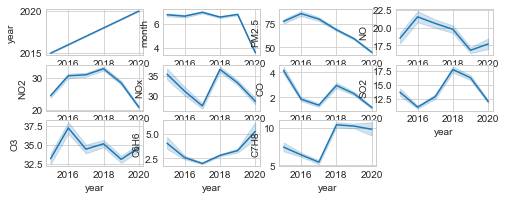

In [129]:
cols = [ 'year','month', 'PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2',
       'O3', 'C6H6', 'C7H8']
x= df.iloc[ : , 2:]
fig = plt.figure(figsize=(8,8))
for i , col in enumerate(cols):
    fig.add_subplot(8, 4, i+1)
    sns.lineplot(x='year',y=col , data=x)

In [130]:
#correlation analysis
df.corr(method = 'pearson')

,year,month,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,C7H8,AQI
year,1.000000,-0.203102,-0.205133,-0.050623,-0.061678,-0.017076,-0.060840,0.037703,-0.018367,0.036206,0.082403,-0.192464
month,-0.203102,1.000000,0.040526,0.030438,0.034418,0.025299,-0.000168,-0.026382,-0.081038,-0.012848,0.010406,0.022163
PM2.5,-0.205133,0.040526,1.000000,0.419048,0.344341,0.380725,0.086663,0.119512,0.155330,0.021934,0.107788,0.654743
NO,-0.050623,0.030438,0.419048,1.000000,0.456067,0.737791,0.198676,0.162788,0.012467,0.026903,0.118742,0.447082
NO2,-0.061678,0.034418,0.344341,0.456067,1.000000,0.574190,0.353237,0.382758,0.285448,0.025082,0.254074,0.535325
NOx,-0.017076,0.025299,0.380725,0.737791,0.574190,1.000000,0.225097,0.208355,0.083063,0.037383,0.168780,0.474232
CO,-0.060840,-0.000168,0.086663,0.198676,0.353237,0.225097,1.000000,0.472583,0.039787,0.061351,0.274882,0.678351
SO2,0.037703,-0.026382,0.119512,0.162788,0.382758,0.208355,0.472583,1.000000,0.156610,0.033059,0.265522,0.484797
O3,-0.018367,-0.081038,0.155330,0.012467,0.285448,0.083063,0.039787,0.156610,1.000000,0.018748,0.113683,0.193988
C6H6,0.036206,-0.012848,0.021934,0.026903,0.025082,0.037383,0.061351,0.033059,0.018748,1.000000,0.694691,0.043354


Text(0.5, 1.0, 'Correlation Analysis')

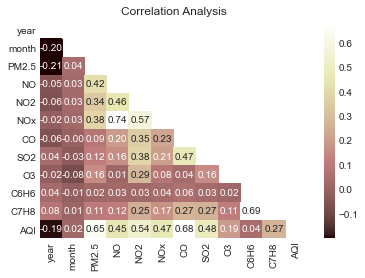

In [131]:
mask = np.triu(df.corr(method = 'pearson'))
sns.heatmap(df.corr(method = 'pearson'),annot = True , fmt = '0.2f', mask = mask, robust = True , cmap = 'pink')
plt.title('Correlation Analysis')

Text(0.5, 0, 'Features')

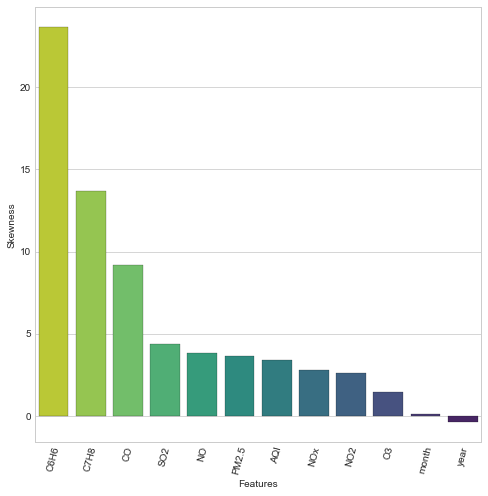

In [132]:
#analysing skewness in data 
skew = pd.DataFrame(df.skew().sort_values(ascending = False))
skew.columns = ['Skewness']

plt.figure(figsize = (8,8))
plt.xticks(rotation =75)
sns.barplot(x=skew.index , y = 'Skewness', data = skew, edgecolor = 'black', linewidth=0.2 , palette = 'viridis_r')
plt.xlabel('Features')

In [133]:
df.City.unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [134]:
#plotting the average AQI ove years which have AQI greater than 500
df['City'][df['AQI']>= 500].value_counts()
cols = ['Ahmedabad','Amritsar', 'Bengaluru','Bhopal','Chandigarh', 'Chennai','Hyderabad','Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong']

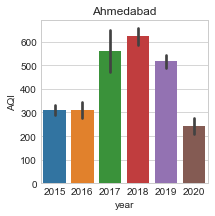

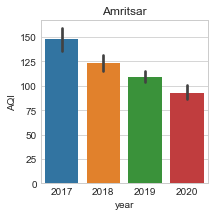

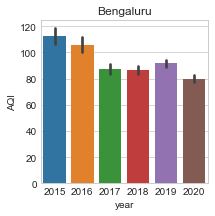

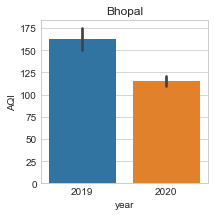

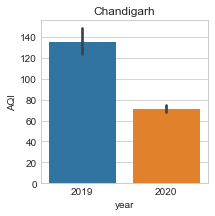

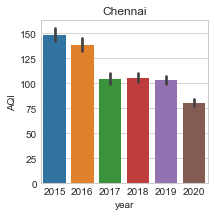

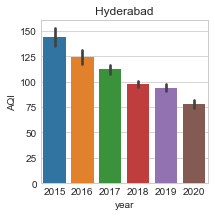

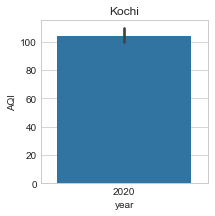

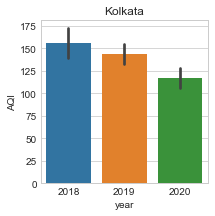

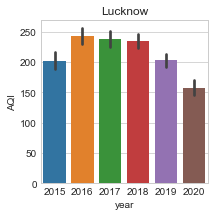

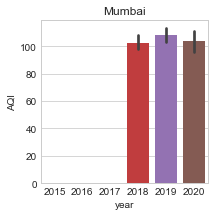

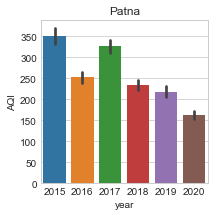

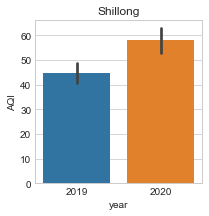

In [135]:
for col in cols:
    plt.figure(figsize= (3,3))
    x=df[df['City']== col]
    sns.barplot(x='year', y = 'AQI', data=x)
    plt.title(col)

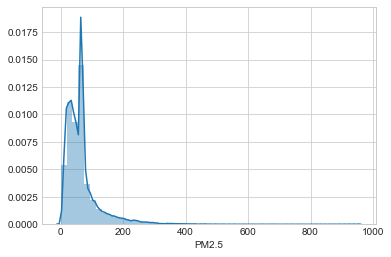

In [136]:
sns.distplot(df['PM2.5'])



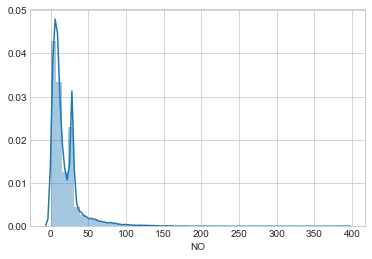

In [137]:
sns.distplot(df['NO'])

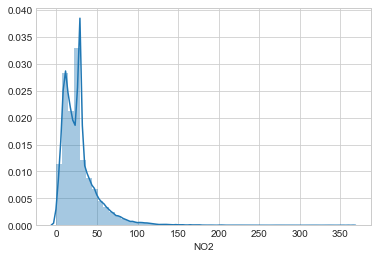

In [138]:
sns.distplot(df['NO2'])

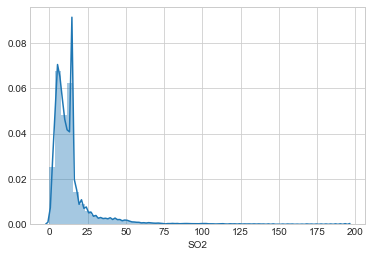

In [139]:
sns.distplot(df['SO2'])

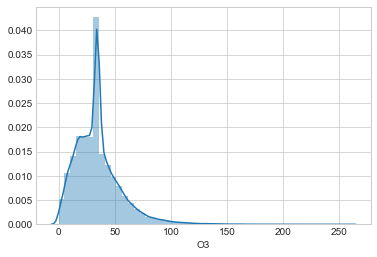

In [140]:
sns.distplot(df['O3'])

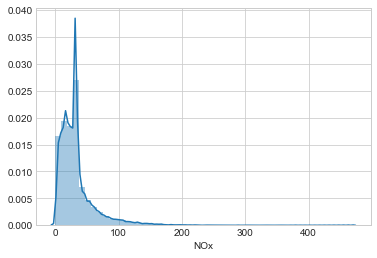

In [141]:
sns.distplot(df['NOx'])

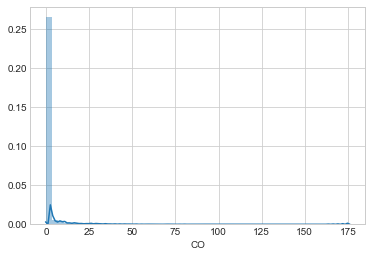

In [142]:
sns.distplot(df['CO'])

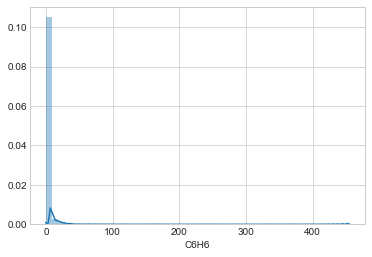

In [143]:
sns.distplot(df['C6H6'])

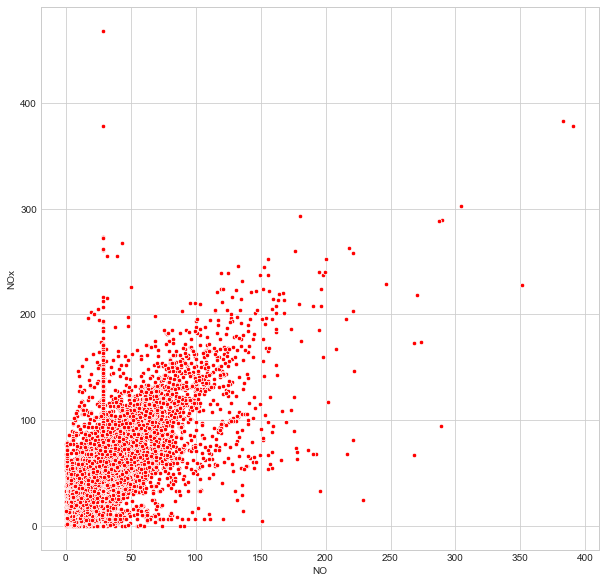

In [144]:
plt.figure(figsize=(10,10))
sns.scatterplot(x ='NO',y='NOx',data=df , s=20, color = 'red')

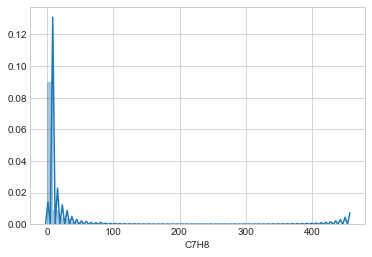

In [145]:
sns.distplot(df['C7H8'])

In [146]:
cols = [ 'PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2',
       'O3', 'C6H6', 'C7H8']

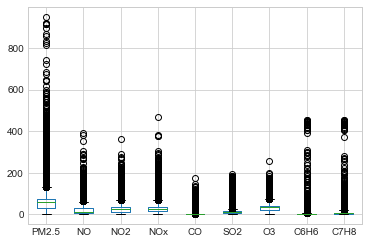

In [147]:
boxplot = df.boxplot(column = cols)

We need to remove outliers from PM2.5 , NO , NO2 , NOx , O3 , C6H6 , C7H8

In [148]:
df.NO.describe()

count    29531.000000
mean        18.907282
std         21.658263
min          0.020000
25%          6.210000
50%         11.530000
75%         28.560659
max        390.680000
Name: NO, dtype: float64

In [149]:
df.C6H6.describe()

count    29531.000000
mean         3.280840
std         14.226364
min          0.000000
25%          0.240000
50%          1.840000
75%          3.280840
max        455.030000
Name: C6H6, dtype: float64

In [150]:
df.C7H8.describe()

count    29531.000000
mean         8.700972
std         17.034769
min          0.000000
25%          1.280000
50%          6.930000
75%          8.700972
max        454.850000
Name: C7H8, dtype: float64

In [151]:
df.O3.describe()

count    29531.000000
mean        34.491430
std         20.163443
min          0.010000
25%         20.740000
50%         34.491430
75%         42.730000
max        257.730000
Name: O3, dtype: float64

In [152]:
df.NOx.describe()

count    29531.000000
mean        32.309123
std         29.317936
min          0.000000
25%         14.670000
50%         27.550000
75%         36.015000
max        467.630000
Name: NOx, dtype: float64

In [153]:
df.NO2.describe()

count    29531.000000
mean        28.560659
std         22.941051
min          0.010000
25%         12.980000
50%         25.240000
75%         34.665000
max        362.210000
Name: NO2, dtype: float64

In [154]:
df['PM2.5'].describe()

count    29531.000000
mean        67.450578
std         59.414476
min          0.040000
25%         32.150000
50%         58.030000
75%         72.450000
max        949.990000
Name: PM2.5, dtype: float64

# REMOVING THE OUTLIERS                                  #Using Z-Score   Z=(X-mean)/Std

In [155]:
df['NO']=(df.NO - df.NO.mean()) /df.NO.std()


In [156]:
df['NO2']=(df.NO2 - df.NO2.mean()) /df.NO2.std()
df['NOx']=(df.NOx - df.NOx.mean()) /df.NOx.std()
df['PM2.5']=(df['PM2.5'] - df['PM2.5'].mean()) /df['PM2.5'].std()
df['C6H6']=(df.C6H6 - df.C6H6.mean()) /df.C6H6.std()
df['C7H8']=(df.C7H8 - df.C7H8.mean()) /df.C7H8.std()
df['O3']=(df.O3 - df.O3.mean()) /df.O3.std()

# Removing outliers for NO

In [157]:
df[df['NO']>3]

,City,Date,year,month,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket
6,Ahmedabad,1/7/2015,2015,1,-7.127614e-14,4.305642,0.525666,3.358384,112.16,32.280000,-5.065754e-02,-0.230617,-5.107772e-01,NaN,NaN
10,Ahmedabad,1/11/2015,2015,1,-7.127614e-14,5.224921,1.187362,-0.265337,132.07,25.030000,-1.373844e+00,-0.230617,-5.107772e-01,NaN,NaN
298,Ahmedabad,10/26/2015,2015,10,2.346893e+00,5.836697,1.181696,5.753846,145.32,20.470000,1.740065e-01,-0.111823,-3.082503e-01,971.0,Severe
565,Ahmedabad,7/19/2016,2016,7,-4.386234e-01,3.779745,1.139413,0.549523,100.77,15.750000,1.085366e-13,-0.230617,-5.107772e-01,499.0,Severe
575,Ahmedabad,7/29/2016,2016,7,-3.578350e-01,3.131032,0.047920,2.867899,86.72,14.310000,-1.474026e+00,0.155989,1.061302e+00,776.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26859,Talcher,3/26/2020,2020,3,-5.117571e-02,6.088795,-0.992573,-0.966273,2.59,0.010000,2.999770e-01,-0.230617,8.310981e-14,130.0,Moderate
26867,Talcher,4/3/2020,2020,4,-5.601426e-01,3.073779,-0.990829,-0.837683,2.02,14.531977,3.583642e+00,-0.230617,8.310981e-14,NaN,NaN
26924,Talcher,5/30/2020,2020,5,-7.966169e-01,3.199366,-0.341774,-0.115940,1.70,24.770000,1.085366e-13,-0.230617,8.310981e-14,95.0,Satisfactory
28672,Visakhapatnam,2/24/2018,2018,2,3.260051e-01,3.096403,2.696883,2.922473,1.71,29.370000,-6.715832e-01,0.553139,1.498642e+00,195.0,Moderate


In [158]:
df[df['NO']<-3]

,City,Date,year,month,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket


In [159]:
df = df[(df.NO>-3) & (df.NO<3)]
df.head()

,City,Date,year,month,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015,2015,1,-7.127614e-14,-0.830504,-0.450749,-0.517060,0.92,27.64,4.903357,-0.230617,-0.509603,NaN,NaN
1,Ahmedabad,1/2/2015,2015,1,-7.127614e-14,-0.828196,-0.561032,-0.540595,0.97,24.55,-0.021397,0.028058,-0.187908,NaN,NaN
2,Ahmedabad,1/3/2015,2015,1,-7.127614e-14,-0.069594,-0.403672,-0.088994,17.40,29.07,-0.188035,0.247369,0.451960,NaN,NaN
3,Ahmedabad,1/4/2015,2015,1,-7.127614e-14,-0.794490,-0.439416,-0.489090,1.70,18.59,0.078785,0.080777,0.084476,NaN,NaN
4,Ahmedabad,1/5/2015,2015,1,-7.127614e-14,0.147413,-0.311261,0.185923,22.10,39.33,0.238976,0.262130,0.598131,NaN,NaN


In [160]:
df.shape

(28884, 15)

# REMOVING OUTLIERS FOR PM2.5    

In [161]:
df[df['PM2.5']>3]

,City,Date,year,month,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket
667,Ahmedabad,10/29/2016,2016,10,5.288937,0.488623,-0.137337,7.705480e-01,29.49,49.33,-0.929972,6.902087e-01,1.142312e+00,472.0,Severe
669,Ahmedabad,10/31/2016,2016,10,3.440229,-0.116227,-0.578904,-2.145865e-02,16.39,33.31,0.334693,1.681102e-02,-5.340376e-03,721.0,Severe
1280,Ahmedabad,7/4/2018,2018,7,3.949028,0.382889,-0.020080,5.767380e-02,27.20,46.94,-1.666949,1.391192e-01,2.038714e+00,440.0,Severe
3141,Amritsar,5/6/2017,2017,5,3.860834,-0.253819,-0.507416,-2.593227e-14,0.00,15.32,-0.926500,-1.273610e-14,8.310981e-14,117.0,Moderate
3143,Amritsar,5/8/2017,2017,5,13.485088,-0.263054,-0.527468,-2.593227e-14,0.00,27.92,-0.917573,-1.273610e-14,8.310981e-14,110.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25728,Shillong,9/2/2019,2019,9,14.258973,-0.812036,-1.087599,-1.055638e+00,0.23,5.56,-0.323924,-2.207760e-01,-4.526608e-01,NaN,NaN
25729,Shillong,9/3/2019,2019,9,14.311654,-0.814806,-1.089778,-1.054273e+00,0.19,5.55,-0.460806,-2.214790e-01,-4.567700e-01,NaN,NaN
25730,Shillong,9/4/2019,2019,9,3.491900,-0.813883,-1.086727,-1.052909e+00,0.28,5.14,-0.762837,-2.123410e-01,-4.274183e-01,NaN,NaN
26797,Talcher,1/24/2020,2020,1,4.627987,0.013977,-0.927188,-4.539584e-01,1.45,10.28,-0.304086,-2.306169e-01,8.310981e-14,NaN,NaN


In [162]:
df[df['PM2.5'] <-3]

,City,Date,year,month,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket


In [163]:
df = df[(df['PM2.5']>-3)&(df['PM2.5']<3)]
df.head()

,City,Date,year,month,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015,2015,1,-7.127614e-14,-0.830504,-0.450749,-0.517060,0.92,27.64,4.903357,-0.230617,-0.509603,NaN,NaN
1,Ahmedabad,1/2/2015,2015,1,-7.127614e-14,-0.828196,-0.561032,-0.540595,0.97,24.55,-0.021397,0.028058,-0.187908,NaN,NaN
2,Ahmedabad,1/3/2015,2015,1,-7.127614e-14,-0.069594,-0.403672,-0.088994,17.40,29.07,-0.188035,0.247369,0.451960,NaN,NaN
3,Ahmedabad,1/4/2015,2015,1,-7.127614e-14,-0.794490,-0.439416,-0.489090,1.70,18.59,0.078785,0.080777,0.084476,NaN,NaN
4,Ahmedabad,1/5/2015,2015,1,-7.127614e-14,0.147413,-0.311261,0.185923,22.10,39.33,0.238976,0.262130,0.598131,NaN,NaN


In [164]:
df.shape

(28430, 15)

# Removing outliers for NO2

In [165]:
df[df['NO2']>3]

,City,Date,year,month,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket
1041,Ahmedabad,11/7/2017,2017,11,8.784765e-02,1.111941,3.495016,1.801657e+00,42.990000,106.41,-0.334835,2.129789e+00,6.359876e+00,901.0,Severe
1042,Ahmedabad,11/8/2017,2017,11,4.522370e-01,2.030298,3.364682,2.258033e+00,62.880000,127.84,1.018604,2.957830e+00,9.689537e+00,929.0,Severe
1043,Ahmedabad,11/9/2017,2017,11,3.626965e-01,0.918482,3.977993,1.879425e+00,38.800000,131.99,0.417021,2.602855e+00,8.435044e+00,850.0,Severe
1044,Ahmedabad,11/10/2017,2017,11,3.012637e-01,1.372812,3.335041,1.884201e+00,48.640000,111.22,1.379654,2.252098e+00,7.884405e+00,669.0,Severe
1045,Ahmedabad,11/11/2017,2017,11,5.688752e-01,1.514097,3.411323,1.991302e+00,51.700000,113.03,1.180283,2.164936e+00,7.392470e+00,1141.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26307,Talcher,9/21/2018,2018,9,-7.127614e-14,0.445713,3.330682,-2.593227e-14,2.248598,3.15,-0.718698,-1.273610e-14,8.310981e-14,NaN,NaN
26331,Talcher,10/15/2018,2018,10,-7.127614e-14,0.445713,3.017706,-2.593227e-14,2.248598,17.31,-1.151660,-1.273610e-14,8.310981e-14,16.0,Good
28983,Visakhapatnam,1/1/2019,2019,1,1.079693e+00,0.261919,3.263117,1.455794e+00,1.260000,31.00,1.315677,2.094112e-01,8.682407e-02,278.0,Poor
28985,Visakhapatnam,1/3/2019,2019,1,1.356394e+00,0.301627,3.284041,1.488538e+00,1.380000,29.16,2.916098,1.714535e-01,5.336309e-02,319.0,Very Poor


In [166]:
df[df['NO2']<-3]

,City,Date,year,month,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket


In [167]:
df = df[(df.NO2>-3) & (df.NO2<3)]
df.head()

,City,Date,year,month,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015,2015,1,-7.127614e-14,-0.830504,-0.450749,-0.517060,0.92,27.64,4.903357,-0.230617,-0.509603,NaN,NaN
1,Ahmedabad,1/2/2015,2015,1,-7.127614e-14,-0.828196,-0.561032,-0.540595,0.97,24.55,-0.021397,0.028058,-0.187908,NaN,NaN
2,Ahmedabad,1/3/2015,2015,1,-7.127614e-14,-0.069594,-0.403672,-0.088994,17.40,29.07,-0.188035,0.247369,0.451960,NaN,NaN
3,Ahmedabad,1/4/2015,2015,1,-7.127614e-14,-0.794490,-0.439416,-0.489090,1.70,18.59,0.078785,0.080777,0.084476,NaN,NaN
4,Ahmedabad,1/5/2015,2015,1,-7.127614e-14,0.147413,-0.311261,0.185923,22.10,39.33,0.238976,0.262130,0.598131,NaN,NaN


In [168]:
df.shape

(28043, 15)

# Removing outliers for NOx

In [169]:
df[df['NOx']>3]

,City,Date,year,month,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket
53,Ahmedabad,2/23/2015,2015,2,2.877404,2.714563,1.155542,3.377143,77.70,89.070000,0.139290,3.326863e+00,9.095458e+00,1247.0,Severe
1030,Ahmedabad,10/27/2017,2017,10,1.104435,2.397825,0.980746,3.055838,70.84,61.910000,-0.100748,1.338301e+00,2.734350e+00,1348.0,Severe
3341,Amritsar,11/22/2017,2017,11,1.277625,2.656848,0.829489,3.128831,1.87,11.000000,-0.112155,3.211755e-01,1.455275e-01,318.0,Very Poor
3343,Amritsar,11/24/2017,2017,11,1.248676,2.919566,0.898797,3.361794,2.31,14.290000,1.010669,3.528069e-01,1.337868e-01,302.0,Very Poor
3347,Amritsar,11/28/2017,2017,11,1.048725,2.968046,0.575795,3.160211,2.65,15.280000,0.906024,5.517334e-01,1.654867e-01,306.0,Very Poor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25589,Patna,2/20/2020,2020,2,0.750817,2.331337,1.474620,3.238321,1.20,7.060000,-0.625956,4.071031e-02,-7.284936e-02,251.0,Poor
26084,Talcher,2/10/2018,2018,2,1.272407,2.971278,1.194337,3.645239,2.56,14.531977,-1.149180,-1.273610e-14,8.310981e-14,343.0,Very Poor
26090,Talcher,2/16/2018,2018,2,2.114795,2.389514,1.750981,3.650696,1.77,66.460000,-0.413195,-2.306169e-01,-5.107772e-01,350.0,Very Poor
26092,Talcher,2/18/2018,2018,2,2.386277,2.389514,1.784981,3.677301,1.96,79.830000,-0.498002,-2.306169e-01,-5.107772e-01,369.0,Very Poor


In [170]:
df[df['NOx']<-3]

,City,Date,year,month,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket


In [171]:
df = df[(df.NOx>-3) & (df.NOx<3)]
df.head()

,City,Date,year,month,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015,2015,1,-7.127614e-14,-0.830504,-0.450749,-0.517060,0.92,27.64,4.903357,-0.230617,-0.509603,NaN,NaN
1,Ahmedabad,1/2/2015,2015,1,-7.127614e-14,-0.828196,-0.561032,-0.540595,0.97,24.55,-0.021397,0.028058,-0.187908,NaN,NaN
2,Ahmedabad,1/3/2015,2015,1,-7.127614e-14,-0.069594,-0.403672,-0.088994,17.40,29.07,-0.188035,0.247369,0.451960,NaN,NaN
3,Ahmedabad,1/4/2015,2015,1,-7.127614e-14,-0.794490,-0.439416,-0.489090,1.70,18.59,0.078785,0.080777,0.084476,NaN,NaN
4,Ahmedabad,1/5/2015,2015,1,-7.127614e-14,0.147413,-0.311261,0.185923,22.10,39.33,0.238976,0.262130,0.598131,NaN,NaN


In [172]:
df.shape

(27809, 15)

# Removing outliers for O3

In [173]:
df[df['O3']>3]

,City,Date,year,month,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket
0,Ahmedabad,1/1/2015,2015,1,-7.127614e-14,-0.830504,-0.450749,-0.517060,0.92,27.64,4.903357,-0.230617,-0.509603,NaN,NaN
29,Ahmedabad,1/30/2015,2015,1,2.085253e-01,-0.233504,0.005202,0.299164,13.85,48.49,3.103566,-0.227805,-0.510777,328.0,Very Poor
30,Ahmedabad,1/31/2015,2015,1,4.556031e-01,0.253147,0.178690,0.692439,24.39,67.39,3.810786,-0.213747,-0.510190,514.0,Severe
31,Ahmedabad,2/1/2015,2015,2,1.153581e+00,1.134566,0.589308,1.782556,43.48,75.23,3.382784,-0.202500,-0.508429,782.0,Severe
32,Ahmedabad,2/2/2015,2015,2,1.866202e+00,1.646149,0.294204,1.381096,54.56,55.04,3.614887,-0.198283,-0.507255,914.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28995,Visakhapatnam,1/13/2019,2019,1,8.878210e-01,-0.187794,1.252747,0.349304,1.02,15.43,3.070833,0.096241,-0.092809,280.0,Poor
28998,Visakhapatnam,1/16/2019,2019,1,-7.127614e-14,-0.760785,-0.486929,-0.719325,0.88,12.00,5.897731,-0.056996,-0.342298,226.0,Poor
28999,Visakhapatnam,1/17/2019,2019,1,5.885674e-01,-0.609803,0.051843,-0.404160,0.96,14.97,4.670758,-0.016226,-0.220782,199.0,Moderate
29000,Visakhapatnam,1/18/2019,2019,1,9.921727e-01,-0.125462,1.286748,0.400467,1.12,20.40,3.704653,0.056175,-0.139184,274.0,Poor


In [174]:
df[df['O3']<-3]

,City,Date,year,month,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket


In [175]:
df = df[(df.O3>-3) & (df.O3<3)]
df.head()

,City,Date,year,month,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket
1,Ahmedabad,1/2/2015,2015,1,-7.127614e-14,-0.828196,-0.561032,-0.540595,0.97,24.55,-0.021397,0.028058,-0.187908,NaN,NaN
2,Ahmedabad,1/3/2015,2015,1,-7.127614e-14,-0.069594,-0.403672,-0.088994,17.40,29.07,-0.188035,0.247369,0.451960,NaN,NaN
3,Ahmedabad,1/4/2015,2015,1,-7.127614e-14,-0.794490,-0.439416,-0.489090,1.70,18.59,0.078785,0.080777,0.084476,NaN,NaN
4,Ahmedabad,1/5/2015,2015,1,-7.127614e-14,0.147413,-0.311261,0.185923,22.10,39.33,0.238976,0.262130,0.598131,NaN,NaN
5,Ahmedabad,1/6/2015,2015,1,-7.127614e-14,1.223677,0.432384,1.677842,45.41,45.76,0.596057,0.150366,0.124981,NaN,NaN


In [176]:
df.shape

(27461, 15)

# Removing outliers for C6H6

In [177]:
df[df['C6H6']>3]

,City,Date,year,month,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket
305,Ahmedabad,11/2/2015,2015,11,0.927205,2.609291,0.681719,2.978070,75.42,13.78,1.297822e+00,4.927412,5.657196,NaN,NaN
1049,Ahmedabad,11/15/2017,2017,11,1.369690,1.245378,0.053587,0.554639,45.88,113.64,7.580895e-02,3.262897,-0.413329,1065.0,Severe
1403,Ahmedabad,11/4/2018,2018,11,0.049473,1.160422,1.175157,0.184217,44.04,69.83,1.240293e+00,5.212095,3.726439,625.0,Severe
1616,Ahmedabad,6/5/2019,2019,6,-0.491136,-0.001721,1.446287,0.659012,18.87,112.15,2.392378e+00,7.862808,21.306366,402.0,Severe
1824,Ahmedabad,12/30/2019,2019,12,0.027761,0.719481,0.720078,0.460158,34.49,68.73,-5.366856e-01,4.435368,15.451869,703.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25924,Shillong,3/16/2020,2020,3,-0.745114,-0.833275,-1.134676,-1.066553,0.21,5.40,8.622384e-02,19.586816,16.034208,65.0,Satisfactory
25925,Shillong,3/17/2020,2020,3,-0.497700,-0.828658,-1.127702,-1.066212,0.31,6.19,-1.374836e+00,3.325457,2.465489,49.0,Good
25990,Shillong,5/21/2020,2020,5,-1.077188,-0.832351,-1.132496,-1.065870,0.17,7.77,1.085366e-13,6.725483,5.301453,17.0,Good
25991,Shillong,5/22/2020,2020,5,-0.990846,-0.827272,-1.121163,-1.063142,0.22,8.62,-1.638680e+00,14.209475,11.548676,14.0,Good


In [178]:
df[df['C6H6']<-3]

,City,Date,year,month,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket


In [179]:
df = df[(df.C6H6>-3) & (df.C6H6<3)]
df.head()

,City,Date,year,month,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket
1,Ahmedabad,1/2/2015,2015,1,-7.127614e-14,-0.828196,-0.561032,-0.540595,0.97,24.55,-0.021397,0.028058,-0.187908,NaN,NaN
2,Ahmedabad,1/3/2015,2015,1,-7.127614e-14,-0.069594,-0.403672,-0.088994,17.40,29.07,-0.188035,0.247369,0.451960,NaN,NaN
3,Ahmedabad,1/4/2015,2015,1,-7.127614e-14,-0.794490,-0.439416,-0.489090,1.70,18.59,0.078785,0.080777,0.084476,NaN,NaN
4,Ahmedabad,1/5/2015,2015,1,-7.127614e-14,0.147413,-0.311261,0.185923,22.10,39.33,0.238976,0.262130,0.598131,NaN,NaN
5,Ahmedabad,1/6/2015,2015,1,-7.127614e-14,1.223677,0.432384,1.677842,45.41,45.76,0.596057,0.150366,0.124981,NaN,NaN


In [180]:
df.shape

(27362, 15)

# Removing outliers for C7H8

In [181]:
df[df['C7H8']>3]

,City,Date,year,month,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket
77,Ahmedabad,3/19/2015,2015,3,0.633001,1.262000,0.370050,1.702742,46.24,53.62,5.534060e-01,1.237784,3.913116,883.0,Severe
81,Ahmedabad,3/23/2015,2015,3,1.065556,1.232911,0.543538,1.823146,45.61,65.77,3.515555e-01,1.464827,4.497215,818.0,Severe
82,Ahmedabad,3/24/2015,2015,3,1.280823,0.387507,0.112869,0.847634,27.30,50.98,4.406834e-02,1.077518,3.761661,737.0,Severe
83,Ahmedabad,3/25/2015,2015,3,1.643024,0.227291,0.258024,0.866394,23.83,64.32,4.611598e-01,1.817693,3.246832,585.0,Severe
84,Ahmedabad,3/26/2015,2015,3,1.672983,-0.045123,0.642488,0.946891,17.93,79.71,9.397487e-01,1.462718,3.444662,616.0,Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25429,Patna,9/13/2019,2019,9,-0.533718,0.628985,1.434954,0.113612,0.80,45.57,1.085366e-13,0.893353,3.330191,72.0,Satisfactory
25430,Patna,9/14/2019,2019,9,-0.420109,0.420750,2.089239,0.153178,1.89,46.24,1.085366e-13,0.958724,3.601988,68.0,Satisfactory
25463,Patna,10/17/2019,2019,10,1.065219,-0.134234,-0.183978,-0.555944,2.88,60.34,2.245931e-01,1.776221,6.730882,299.0,Poor
25464,Patna,10/18/2019,2019,10,1.305228,1.343262,0.359589,0.387165,2.67,55.87,3.485798e-01,1.374150,4.341651,313.0,Very Poor


In [182]:
df[df['C7H8']<-3]

,City,Date,year,month,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket


In [183]:
df = df[(df.C7H8>-3) & (df.C7H8<3)]
df.head()

,City,Date,year,month,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket
1,Ahmedabad,1/2/2015,2015,1,-7.127614e-14,-0.828196,-0.561032,-0.540595,0.97,24.55,-0.021397,0.028058,-0.187908,NaN,NaN
2,Ahmedabad,1/3/2015,2015,1,-7.127614e-14,-0.069594,-0.403672,-0.088994,17.40,29.07,-0.188035,0.247369,0.451960,NaN,NaN
3,Ahmedabad,1/4/2015,2015,1,-7.127614e-14,-0.794490,-0.439416,-0.489090,1.70,18.59,0.078785,0.080777,0.084476,NaN,NaN
4,Ahmedabad,1/5/2015,2015,1,-7.127614e-14,0.147413,-0.311261,0.185923,22.10,39.33,0.238976,0.262130,0.598131,NaN,NaN
5,Ahmedabad,1/6/2015,2015,1,-7.127614e-14,1.223677,0.432384,1.677842,45.41,45.76,0.596057,0.150366,0.124981,NaN,NaN


In [184]:
df.shape

(27242, 15)

In [185]:
df.head()

,City,Date,year,month,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket
1,Ahmedabad,1/2/2015,2015,1,-7.127614e-14,-0.828196,-0.561032,-0.540595,0.97,24.55,-0.021397,0.028058,-0.187908,NaN,NaN
2,Ahmedabad,1/3/2015,2015,1,-7.127614e-14,-0.069594,-0.403672,-0.088994,17.40,29.07,-0.188035,0.247369,0.451960,NaN,NaN
3,Ahmedabad,1/4/2015,2015,1,-7.127614e-14,-0.794490,-0.439416,-0.489090,1.70,18.59,0.078785,0.080777,0.084476,NaN,NaN
4,Ahmedabad,1/5/2015,2015,1,-7.127614e-14,0.147413,-0.311261,0.185923,22.10,39.33,0.238976,0.262130,0.598131,NaN,NaN
5,Ahmedabad,1/6/2015,2015,1,-7.127614e-14,1.223677,0.432384,1.677842,45.41,45.76,0.596057,0.150366,0.124981,NaN,NaN


# Hence all outliers from the dataset are removed

In [186]:
cols = [ 'PM2.5', 'NO', 'NO2', 'NOx', 'CO','SO2',
       'O3', 'C6H6', 'C7H8']

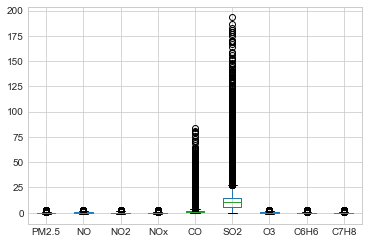

In [187]:
boxplot = df.boxplot(column = cols)

In [188]:
df.describe()

,year,month,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,C7H8,AQI
count,27242.000000,27242.000000,2.724200e+04,27242.000000,27242.000000,27242.000000,27242.000000,27242.000000,27242.000000,2.724200e+04,2.724200e+04,22736.000000
mean,2017.910543,6.229278,-1.342689e-01,-0.140196,-0.125486,-0.145272,1.767544,13.296163,-0.070518,-6.051221e-02,-9.109748e-02,146.939919
std,1.534176,3.354959,6.783253e-01,0.633740,0.732258,0.685434,4.328552,13.990413,0.867752,2.477850e-01,4.808052e-01,108.715161
min,2015.000000,1.000000,-1.134582e+00,-0.872059,-1.244523,-1.102026,0.000000,0.040000,-1.710096,-2.306169e-01,-5.107772e-01,13.000000
25%,2017.000000,3.000000,-6.160212e-01,-0.597337,-0.699648,-0.621006,0.520000,5.950000,-0.701836,-2.151527e-01,-4.409201e-01,78.000000
50%,2018.000000,6.000000,-2.135940e-01,-0.373173,-0.199671,-0.204111,0.910000,10.120000,-0.023628,-1.111205e-01,-1.374232e-01,111.000000
75%,2019.000000,9.000000,-7.127614e-14,0.331985,0.143273,0.013673,1.580000,14.531977,0.347092,-1.273610e-14,8.310981e-14,178.000000
max,2020.000000,12.000000,2.998249e+00,2.999443,2.997654,2.996148,83.720000,193.860000,2.999913,2.972591e+00,2.997929e+00,1842.000000


# TRAINING OF MODEL FOR PREDICTING AQI

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [190]:
df.head(28)

,City,Date,year,month,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket
1,Ahmedabad,1/2/2015,2015,1,-7.127614e-14,-0.828196,-0.561032,-0.540595,0.970000,24.55,-0.021397,0.028058,-0.187908,NaN,NaN
2,Ahmedabad,1/3/2015,2015,1,-7.127614e-14,-0.069594,-0.403672,-0.088994,17.400000,29.07,-0.188035,0.247369,0.451960,NaN,NaN
3,Ahmedabad,1/4/2015,2015,1,-7.127614e-14,-0.794490,-0.439416,-0.489090,1.700000,18.59,0.078785,0.080777,0.084476,NaN,NaN
4,Ahmedabad,1/5/2015,2015,1,-7.127614e-14,0.147413,-0.311261,0.185923,22.100000,39.33,0.238976,0.262130,0.598131,NaN,NaN
5,Ahmedabad,1/6/2015,2015,1,-7.127614e-14,1.223677,0.432384,1.677842,45.410000,45.76,0.596057,0.150366,0.124981,NaN,NaN
7,Ahmedabad,1/8/2015,2015,1,-7.127614e-14,2.860927,0.356537,2.198002,80.870000,38.54,-0.129017,-0.230617,-0.510777,NaN,NaN
8,Ahmedabad,1/9/2015,2015,1,-7.127614e-14,0.473386,0.106331,0.535197,29.160000,58.68,-0.433529,-0.230617,-0.510777,NaN,NaN
9,Ahmedabad,1/10/2015,2015,1,-7.127614e-14,0.445713,-0.938085,-1.102026,2.248598,8.29,-1.484936,-0.230617,-0.510777,NaN,NaN
11,Ahmedabad,1/12/2015,2015,1,-7.127614e-14,1.529796,0.527846,1.975953,52.040000,51.84,0.565309,-0.061213,-0.509016,NaN,NaN
12,Ahmedabad,1/13/2015,2015,1,-7.127614e-14,1.381123,0.681719,1.868511,48.820000,68.21,0.033158,0.433643,0.272914,NaN,NaN


In [191]:
df.shape

(27242, 15)

In [192]:
df1 = df.dropna()

In [193]:
df1.shape

(22736, 15)

In [194]:
X=df1.iloc[: , 4: -2]
Y=df1.iloc[:,-2:-1]

In [195]:
X

,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,C7H8
28,0.263899,-0.553012,0.006510,0.048123,6.93,49.52,1.253187,-2.292111e-01,-5.107772e-01
33,1.216024,0.540335,-0.007003,0.832967,30.61,33.79,1.939578,-2.186673e-01,-5.090161e-01
34,0.222158,-0.763555,-0.249799,-0.283414,2.37,25.73,0.635237,-2.306169e-01,-5.107772e-01
35,-0.153003,-0.752936,-0.312569,-0.306949,2.60,32.66,0.944708,-2.306169e-01,-5.107772e-01
36,0.199268,-0.819423,-0.070645,-0.186886,1.16,67.41,1.230374,-2.306169e-01,-5.107772e-01
...,...,...,...,...,...,...,...,...,...
29526,-0.882455,-0.518383,-0.152594,-0.435540,0.47,8.55,-0.555036,-7.316278e-02,1.977736e-01
29527,-0.724917,-0.715075,-0.109004,-0.538207,0.52,12.72,-0.215808,-1.786008e-01,-3.810426e-01
29528,-0.749659,-0.713690,0.042254,-0.476811,0.48,8.42,-0.175140,-2.299140e-01,-5.101902e-01
29529,-0.855189,-0.685987,0.030484,-0.460780,0.52,9.84,-0.307062,-2.306169e-01,-5.107772e-01


In [196]:
Y

,AQI
28,209.0
33,660.0
34,294.0
35,149.0
36,190.0
...,...
29526,41.0
29527,70.0
29528,68.0
29529,54.0


In [197]:
from sklearn import linear_model

from sklearn.model_selection import train_test_split
X_train , X_test , Y_train ,Y_test = train_test_split(X,Y,test_size = 0.2 , random_state = 0)

In [198]:
from sklearn.linear_model import LinearRegression
regr =LinearRegression()
regr.fit(X_train,Y_train)

LinearRegression()

In [199]:
regr.coef_

array([[91.99969354,  3.70336604,  0.737084  ,  5.66442359, 11.90804028,
         0.62665198,  4.88507549, -7.447279  ,  4.60301442]])

In [200]:
regr.intercept_

array([133.27985978])

In [201]:
y_pred = regr.predict(X_test)         #predicting the test set result

In [202]:
#R square 
#this gives the goodness of fit of a model 
#R square equal to 1 indicates that regression prediction perfectly fit the data
from sklearn.metrics import r2_score
score = r2_score(Y_test,y_pred)

In [203]:
score

0.8111822828412426

# TRAINING THE MODEL FOR THE AQI BUCKET

In [265]:
df2 = df1

In [266]:
df.head()

,City,Date,year,month,PM2.5,NO,NO2,NOx,CO,SO2,O3,C6H6,C7H8,AQI,AQI_Bucket
1,Ahmedabad,1/2/2015,2015,1,-7.127614e-14,-0.828196,-0.561032,-0.540595,0.97,24.55,-0.021397,0.028058,-0.187908,NaN,NaN
2,Ahmedabad,1/3/2015,2015,1,-7.127614e-14,-0.069594,-0.403672,-0.088994,17.40,29.07,-0.188035,0.247369,0.451960,NaN,NaN
3,Ahmedabad,1/4/2015,2015,1,-7.127614e-14,-0.794490,-0.439416,-0.489090,1.70,18.59,0.078785,0.080777,0.084476,NaN,NaN
4,Ahmedabad,1/5/2015,2015,1,-7.127614e-14,0.147413,-0.311261,0.185923,22.10,39.33,0.238976,0.262130,0.598131,NaN,NaN
5,Ahmedabad,1/6/2015,2015,1,-7.127614e-14,1.223677,0.432384,1.677842,45.41,45.76,0.596057,0.150366,0.124981,NaN,NaN


In [267]:
X1=df2.iloc[: , 13: -1]
Y1=df2.iloc[:,-1:]

In [268]:
X1

,AQI
28,209.0
33,660.0
34,294.0
35,149.0
36,190.0
...,...
29526,41.0
29527,70.0
29528,68.0
29529,54.0


In [269]:
Y1

,AQI_Bucket
28,Poor
33,Severe
34,Poor
35,Moderate
36,Moderate
...,...
29526,Good
29527,Satisfactory
29528,Satisfactory
29529,Satisfactory


In [270]:
from sklearn import linear_model

from sklearn.model_selection import train_test_split
X1_train , X1_test , Y1_train ,Y1_test = train_test_split(X1,Y1,test_size = 0.2 , random_state = 0)

In [271]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X1_train,Y1_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [272]:
len(X1_train)

18188

In [273]:
len(X1_test)

4548

In [274]:
y1_pred = model.predict(X1_test) 

In [275]:
model.score(X1_test, Y1_test)

1.0

# you can check some of the predictions acc to their AQI value

In [276]:
model.predict([[8]])      

array(['Good'], dtype=object)

In [277]:
model.predict([[800]])  

array(['Severe'], dtype=object)

In [278]:
model.predict([[89]])  

array(['Satisfactory'], dtype=object)

In [279]:
model.predict([[289]])  

array(['Poor'], dtype=object)